### Agglomerative Clustering with zoo.csv data

In [73]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

#### Read data from zoo.csv

In [74]:
data = pd.read_csv('zoo.csv')
data.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


#### Unique number of high level class

In [75]:
# df.groupby(['domain', 'ID']).count()
# df = df.groupby('domain')['ID'].nunique()
#data = data.groupby('class_type')['animal_name'].nunique()
df = data.groupby(['class_type']).count()
df

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
class_type,,,,,,,,,,,,,,,,,
1,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41
2,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20
3,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
4,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13
5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
6,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
7,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10


In [76]:
names = data['animal_name']
data.drop('animal_name',axis=1,inplace=True)
data.head(2)

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1


In [77]:
from sklearn.preprocessing import normalize #to retain the wt. values of variable compare to other.
data_scaled = normalize(data) # give weighted score for each data point
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,0.204124,0.0,0.000000,0.204124,0.0,0.000000,0.204124,0.204124,0.204124,0.204124,0.0,0.000000,0.816497,0.000000,0.0,0.204124,0.204124
1,0.204124,0.0,0.000000,0.204124,0.0,0.000000,0.000000,0.204124,0.204124,0.204124,0.0,0.000000,0.816497,0.204124,0.0,0.204124,0.204124
2,0.000000,0.0,0.208514,0.000000,0.0,0.208514,0.208514,0.208514,0.208514,0.000000,0.0,0.208514,0.000000,0.208514,0.0,0.000000,0.834058
3,0.204124,0.0,0.000000,0.204124,0.0,0.000000,0.204124,0.204124,0.204124,0.204124,0.0,0.000000,0.816497,0.000000,0.0,0.204124,0.204124
4,0.200000,0.0,0.000000,0.200000,0.0,0.000000,0.200000,0.200000,0.200000,0.200000,0.0,0.000000,0.800000,0.200000,0.0,0.200000,0.200000


#### Plot Clustering by Dendograms

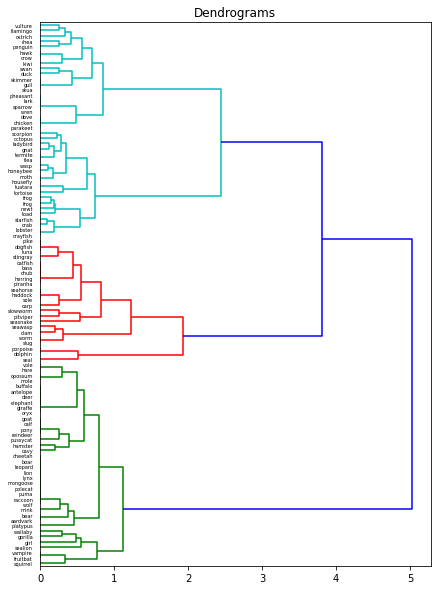

In [78]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(7,10))  
plt.title("Dendrograms")
# dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')
#Z = hierarchy.linkage(X.as_matrix(), 'single')
#dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
z = shc.linkage(data_scaled, method='ward')
dend = shc.dendrogram(z,labels=names.tolist(),orientation='right',link_color_func=None)
#plt.axhline(x=3, color='r', linestyle='--')

#### Clustering using Agglomerative Module

In [79]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage="ward")  
cluster.fit_predict(data)
cluster.labels_

array([3, 3, 1, 3, 3, 3, 3, 1, 1, 3, 3, 6, 1, 5, 2, 2, 6, 3, 1, 0, 6, 6,
       3, 6, 2, 4, 4, 0, 3, 0, 2, 3, 0, 6, 1, 3, 3, 6, 1, 2, 2, 6, 2, 6,
       3, 3, 2, 3, 3, 3, 3, 2, 4, 2, 3, 3, 6, 6, 6, 6, 1, 1, 1, 3, 3, 3,
       0, 3, 3, 3, 3, 6, 2, 1, 0, 0, 1, 5, 6, 6, 1, 5, 1, 6, 0, 2, 1, 6,
       2, 4, 4, 4, 1, 0, 3, 6, 0, 2, 3, 5, 6], dtype=int32)

In [80]:
from sklearn.metrics import silhouette_score
silhouette_score(data, cluster.labels_, metric='euclidean')

0.5343312829061678

In [81]:
agg_average = AgglomerativeClustering(linkage="average")
clustering_average = agg_average.fit(data)
silhouette_score(data, agg_average.labels_, metric='euclidean')

0.4289403306361852

In [82]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=7)
kmeans.fit(data)
kmeans.cluster_centers_

array([[ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  2.50000000e-01,
         5.00000000e-01,  0.00000000e+00,  0.00000000e+00,
         5.00000000e-01,  2.50000000e-01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  7.00000000e+00],
       [ 1.00000000e+00, -8.32667268e-17,  3.22580645e-02,
         1.00000000e+00, -1.66533454e-16,  6.45161290e-02,
         5.48387097e-01,  9.67741935e-01,  1.00000000e+00,
         1.00000000e+00, -2.77555756e-17, -5.55111512e-17,
         4.00000000e+00,  9.03225806e-01,  2.25806452e-01,
         8.06451613e-01,  1.00000000e+00],
       [-5.55111512e-17,  9.52380952e-01,  1.00000000e+00,
        -1.11022302e-16,  7.61904762e-01,  2.85714286e-01,
         4.28571429e-01,  2.22044605e-16,  1.00000000e+00,
         1.00000000e+00, -1.38777878e-17, -2.77555756e-17,
         2.09523810e+00,  1.00000000e+00,  1.42857143e-01,
         3.33333333e-01,  2.0

In [83]:
ground_truth = data["class_type"]

In [84]:
from sklearn.metrics import adjusted_rand_score
agg_complete = AgglomerativeClustering(linkage="complete", n_clusters=7)
clustering_complete = agg_complete.fit(data)
adjusted_rand_score(ground_truth, agg_complete.labels_)

0.47459282397152913

In [85]:
adjusted_rand_score(agg_complete.labels_, agg_average.labels_)

0.3401196222541912